RadioButtons(description='Filtro:', options=('Todos os anos', 'Últimos 5 anos', 'Ano específico'), style=Descr…

IntText(value=2020, description='Ano:', layout=Layout(visibility='hidden'), style=DescriptionStyle(description…

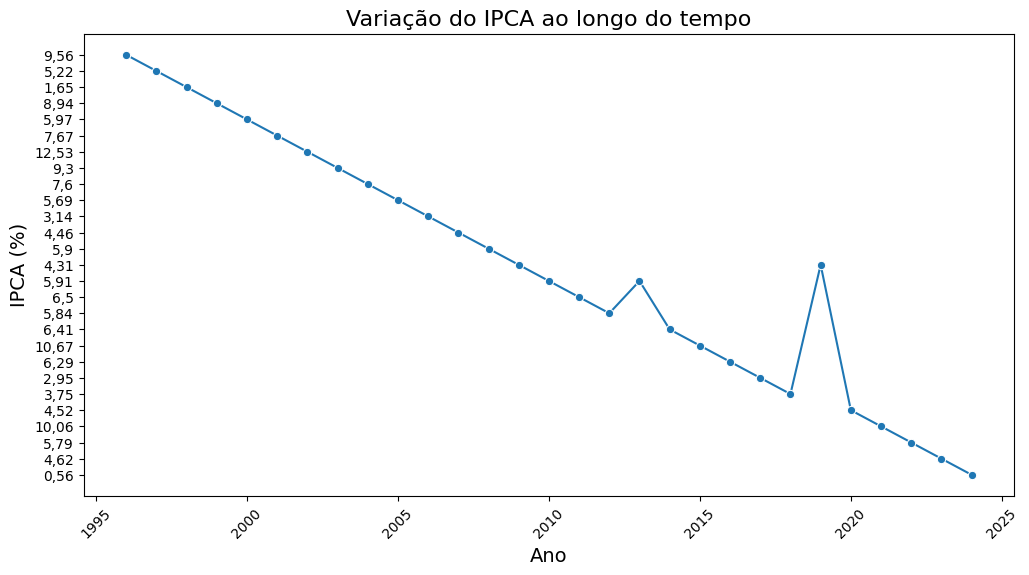

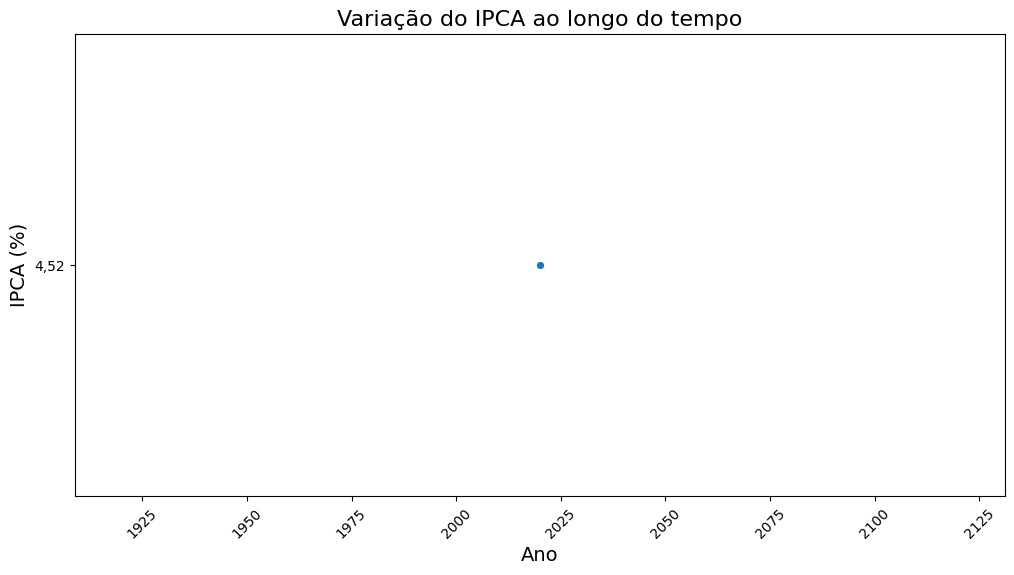

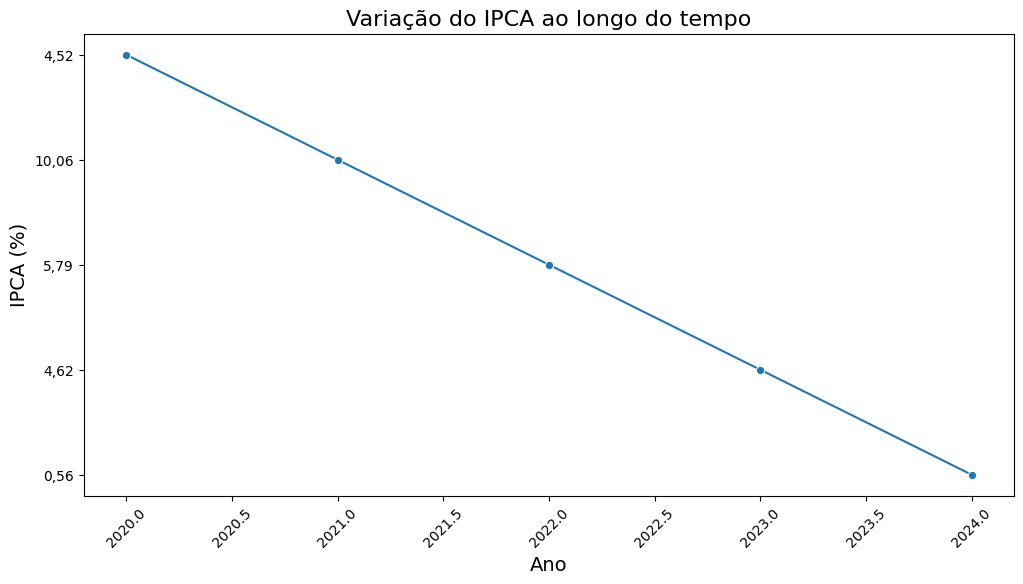

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive
from pymongo import MongoClient
from IPython.display import display

# Conectar ao MongoDB
client = MongoClient('mongodb://localhost:27017')
db = client['big_data_ibge']
collection = db['inflacao']

# Buscar os dados do MongoDB
data = pd.DataFrame(list(collection.find()))
data = data.drop(columns=['_id'], errors='ignore') # Remove a coluna _id.
data.columns = ['Data', 'Ano', 'IPCA']

#Função para gerar gráficos comparativos
def plot_comparacao(anos_selecionados):
    # Filtra os dados de acordo com o ano selecionado.
    df_filtrado = data[data['Ano'].isin(anos_selecionados)]

    if df_filtrado.empty:
        print("Nenhum dado disponível para os anos escolhidos.")
        return

    df_filtrado = df_filtrado.sort_values(by='Ano')

    # Gráfico de Linha para vizualizar a variação do IPCA ao longo do tempo
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Ano', y='IPCA', data=df_filtrado, marker='o')
    plt.title('Variação do IPCA ao longo do tempo', fontsize=16)
    plt.ylabel('IPCA (%)', fontsize=14)
    plt.xlabel('Ano', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

# Widgets para seleção de filtro
filtro_widget = widgets.RadioButtons(
    options=['Todos os anos', 'Últimos 5 anos', 'Ano específico'],
    description='Filtro:',
    style={'description_width': 'initial'}
)

ano_especifico_widget = widgets.IntText(
    value=2020, 
    description='Ano:',
    min=data['Ano'].min(),
    max=data['Ano'].max(),
    style={'description_width': 'initial'}
)

# Função para exibir os widgets adequadamente
def update_plot(filtro):
    if filtro == 'Últimos 5 anos':
        anos_selecionados = list(range(data['Ano'].max() -4, data['Ano'].max() + 1))
    elif filtro == 'Ano específico':
        anos_selecionados = [ano_especifico_widget.value]
    else:
        anos_selecionados = data['Ano'].unique() # Todos os anos

    # Chama a função de plotagem com o filtro selecionado
    plot_comparacao(anos_selecionados)

# Interatividade
ano_especifico_widget.layout.visibility = "hidden" 

def on_filtro_change(change):
    if change['new'] == 'Ano específico':
        ano_especifico_widget.layout.visibility = 'visible' # Exibe o campo para o ano específico
    else:
        ano_especifico_widget.layout.visibility = 'hidden' # Oculta o campo se não for a opção "Ano específico"
    update_plot(change['new'])

filtro_widget.observe(on_filtro_change, names='value')
display(filtro_widget, ano_especifico_widget)

# Inicializa com o gráfico de "Todos os anos"
update_plot('Todos os anos')

